# Fifa 19
Dataset used: [Fifa 19 dataset](https://www.kaggle.com/karangadiya/fifa19)

Target Variable:
- Wage: integer, in thousand €, not null



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
import datetime

In [2]:
# Read data from file
df = pd.read_csv("../data/fifa/fifa19_df_cleaned.csv")
df_small1 = pd.read_csv("../data/fifa/fifa19_dfsmall1_cleaned.csv")
df_small2 = pd.read_csv("../data/fifa/fifa19_dfsmall2_cleaned.csv")
pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 500)
df.head()


,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Joined,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,foot_left,foot_right,nationality_afghanistan,nationality_albania,nationality_algeria,nationality_andorra,nationality_angola,nationality_antigua & barbuda,nationality_argentina,nationality_armenia,nationality_australia,nationality_austria,nationality_azerbaijan,nationality_barbados,nationality_belarus,nationality_belgium,nationality_belize,nationality_benin,nationality_bermuda,nationality_bolivia,nationality_bosnia herzegovina,nationality_botswana,nationality_brazil,nationality_bulgaria,nationality_burkina faso,nationality_burundi,nationality_cameroon,nationality_canada,nationality_cape verde,nationality_central african rep.,nationality_chad,nationality_chile,nationality_china pr,nationality_colombia,nationality_comoros,nationality_congo,nationality_costa rica,nationality_croatia,nationality_cuba,nationality_curacao,nationality_cyprus,nationality_czech republic,nationality_denmark,nationality_dominican republic,nationality_dr congo,nationality_ecuador,nationality_egypt,nationality_el salvador,nationality_england,nationality_equatorial guinea,nationality_eritrea,nationality_estonia,nationality_ethiopia,nationality_faroe islands,nationality_fiji,nationality_finland,nationality_france,nationality_fyr macedonia,nationality_gabon,nationality_gambia,nationality_georgia,nationality_germany,nationality_ghana,nationality_greece,nationality_grenada,nationality_guam,nationality_guatemala,nationality_guinea,nationality_guinea bissau,nationality_guyana,nationality_haiti,nationality_honduras,nationality_hong kong,nationality_hungary,nationality_iceland,nationality_indonesia,nationality_iran,nationality_iraq,nationality_israel,nationality_italy,nationality_ivory coast,nationality_jamaica,nationality_japan,nationality_jordan,nationality_kazakhstan,nationality_kenya,nationality_korea dpr,nationality_korea republic,nationality_kosovo,nationality_kuwait,nationality_latvia,nationality_lebanon,nationality_liberia,nationality_libya,nationality_liechtenstein,nationality_lithuania,nationality_luxembourg,nationality_madagascar,nationality_mali,nationality_mauritania,nationality_mauritius,nationality_mexico,nationality_moldova,nationality_montenegro,nationality_montserrat,nationality_morocco,nationality_mozambique,nationality_namibia,nationality_netherlands,nationality_new caledonia,nationality_new zealand,nationality_nicaragua,nationality_niger,nationality_nigeria,nationality_northern ireland,nationality_norway,nationality_palestine,nationality_panama,nationality_paraguay,nationality_peru,nationality_philippines,nationality_poland,nationality_portugal,nationality_puerto rico,nationality_qatar,nationality_republic of ireland,nationality_romania,nationality_russia,nationality_rwanda,nationality_saudi arabia,nationality_scotland,nationality_senegal,nationality_serbia,nationality_sierra leone,nationality_slovakia,nationality_slovenia,nationality_south africa,nationality_south sudan,nationality_spain,nationality_st kitts nevis,nationality_sudan,nationality_suriname,nationality_sweden,nationality_switzerland,nationality_syria,nationality_são tomé & príncipe,nationality_tanzania,nationality_thailand,nationality_togo,nationality_trinidad & tobago,nationality_tunisia,nationality_turkey,nationality_uganda,nationality_ukraine,nationality_united arab emirates,nationality_united states,nationality_uruguay,nationality_uzbekistan,nationality_venezuela,nationality_wales,nationality_zambia,nationality_zimbabw

# Modeling:
Regressionstechniken: Linear, Polynomial, knn, Regression Trees

In [3]:
# reduce dataframe to subset to make manageable for polynomial regression
df_small1 = df_small1.sample(n = 5000)
df_small1.shape
df_small2 = df_small2.sample(n = 500)
df_small2.shape


(500, 851)

In [4]:
def print_scores(model, x_train, y_train):
    r_sq = model.score(x_train, y_train)
    b0 = model.intercept_
    b1 = model.coef_
    print("r_sq, coefficient of determination: ")
    print(r_sq)
    print("b0, intercept: ")
    print(b0)
    print("b1, slope: ")
    print(b1)
    
    print("y_pred = model.intercept_ + model.coef_ * x")

In [5]:
# Metrics
def print_metrics(y_test, y_pred):
    results = pd.DataFrame(list(zip(y_test, y_pred)), 
                   columns =['Wage_test', 'Wage_prediction']) 
    
    accuracy = results["Wage_test"] - results["Wage_prediction"]
    accuracy = np.square(accuracy)
    accuracy = np.sqrt(accuracy)
    
    print("# compare test and prediction")
    print(results)
    
    print("# bad predictions (over 100 difference)")
    print(results[(results["Wage_test"] - results["Wage_prediction"]) > 100])
    
    print("# span of data")
    span = results["Wage_test"].max() - results["Wage_test"].min()
    print(span)
    
    print("# median accuracy")
    median = np.median(accuracy) 
    print(median)
    
    print("# percent deviation")
    percent = median / span * 100
    percent_str = "{:.4f}".format(percent)
    percent_str = percent_str + " %"
    print(percent_str)
    return results

In [6]:
# Scores
def print_performance(y_test, y_pred):
    # Mean Squared Error
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    # R2 is between 0 and 100 percent
    # 0 indicates that the model explains none of the variability of the response data around its mean.
    # 100 indicates that the model explains all the variability of the response data around its mean.
    print("R2: ", metrics.r2_score(y_test,y_pred) * 100)

In [7]:
def print_scatterplot(y_test, y_pred):
    # Plot outputs
    plt.scatter(np.log(y_test), np.log(y_pred))
    
    plt.xlabel("Wage_test (log)")
    plt.ylabel("Wage_prediction (log)")
    
    # plt.xlim(-1, 500)
    # plt.ylim(-1, 500)
    
    # plt.xticks(())
    # plt.yticks(())
    
    plt.show()


In [15]:
######### Linear Regression #########
def linear_reg(dataset):
    # Train & Test
    train, test = train_test_split(dataset, test_size=0.2, random_state=44)
    
    # Training Model
    x_train = train.drop('Wage', axis=1)
    y_train = train['Wage']
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    r_sq = model.score(x_train, y_train)
    
    # Testing
    x_test = test.drop('Wage', axis=1)
    y_test = test['Wage']
    y_pred = model.predict(x_test)
    
    return([y_test, y_pred])

######### Polynomial Regression #########
def polynomial_reg(dataset):
    train, test = train_test_split(dataset, test_size=0.2, random_state=44)
        
    # Training Model
    x_train = train.drop('Wage', axis=1)
    y_train = train['Wage']
    
    poly_features = PolynomialFeatures(degree=2)
    x_train_poly = poly_features.fit_transform(x_train)
    
    print(x_train_poly.shape)
    
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    # Testing
    x_test = test.drop('Wage', axis=1)
    y_test = test['Wage']
    y_pred = model.predict(poly_features.fit_transform(x_test))
    
    return([y_test, y_pred])

######### knn Regression #########
def knn_reg(dataset, k_neighbors):
    train, test = train_test_split(dataset, test_size=0.2, random_state=44)
    # k_neighbors = 5
    
    # Training Model
    x_train = train.drop('Wage', axis=1)
    y_train = train['Wage']
    
    model = neighbors.KNeighborsRegressor(k_neighbors)
    model.fit(x_train, y_train)
    
    r_sq = model.score(x_train, y_train)
    
    # Testing
    x_test = test.drop('Wage', axis=1)
    y_test = test['Wage']
    y_pred = model.predict(x_test)
    
    return([y_test, y_pred])

######### Regression Trees #########
def reg_tree(dataset):
    train, test = train_test_split(dataset, test_size=0.2, random_state=44)
    
    # Training Model
    x_train = train.drop('Wage', axis=1)
    y_train = train['Wage']
    
    model = DecisionTreeRegressor(random_state=0)
    model.fit(x_train, y_train)
    
    r_sq = model.score(x_train, y_train)
    
    # Testing
    x_test = test.drop('Wage', axis=1)
    y_test = test['Wage']
    y_pred = model.predict(x_test)
    
    return([y_test, y_pred])


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


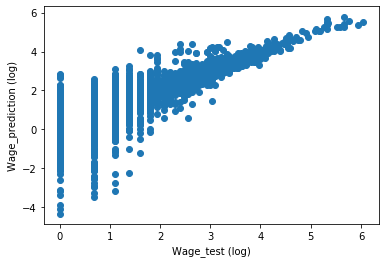

MSE:  69.86946177226602
RMSE:  8.3587954737669
R2:  87.72794203577018
# compare test and prediction
      Wage_test  Wage_prediction
0             4         4.044350
1            11        13.955022
2             2         0.373551
3             3         2.940925
4             5         5.443150
...         ...              ...
2946          3         2.388860
2947          5         5.102782
2948          6         3.365788
2949          9         7.124213
2950          1         2.975204

[2951 rows x 2 columns]
# bad predictions (over 100 difference)
      Wage_test  Wage_prediction
1553        380       217.746084
1596        420       254.313716
# span of data
419
# median accuracy
2.0478774037802623
# percent deviation
0.4888 %


,Wage_test,Wage_prediction
0,4,4.044350
1,11,13.955022
2,2,0.373551
3,3,2.940925
4,5,5.443150
...,...,...
2946,3,2.388860
2947,5,5.102782
2948,6,3.365788
2949,9,7.124213


In [9]:
linear = linear_reg(df)
print_scatterplot(linear[0], linear[1])
print_performance(linear[0], linear[1])
print_metrics(linear[0], linear[1])
# print_scores(model, linear[0], linear[1])

(4000, 4753)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


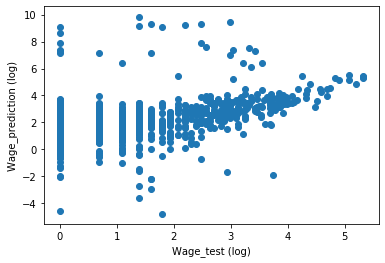

MSE:  2770018.7440719195
RMSE:  1664.3373288104547
R2:  -655943.0219757294
# compare test and prediction
     Wage_test  Wage_prediction
0           27        30.607865
1            3         1.343578
2           13         8.113497
3            2      1295.604443
4            1        -8.171130
..         ...              ...
995         20        14.609649
996         17        30.205549
997          6       -13.091124
998          1         6.095444
999          2         1.693169

[1000 rows x 2 columns]
# bad predictions (over 100 difference)
     Wage_test  Wage_prediction
36           1      -436.943086
86           2     -3754.965910
156          2      -306.666700
193          3      -745.111973
294          2     -9669.015940
310          1    -28936.673485
312          5     -1408.941354
335          7      -521.255977
448          1      -846.813784
603          1      -694.982427
651          8     -4674.972140
697         14     -3650.928233
740         58     -2065.94250

,Wage_test,Wage_prediction
0,27,30.607865
1,3,1.343578
2,13,8.113497
3,2,1295.604443
4,1,-8.171130
...,...,...
995,20,14.609649
996,17,30.205549
997,6,-13.091124
998,1,6.095444


In [10]:
polynomial = polynomial_reg(df_small1)
print_scatterplot(polynomial[0], polynomial[1])
print_performance(polynomial[0], polynomial[1])
print_metrics(polynomial[0], polynomial[1])
# print_scores(model, polynomial[0], polynomial[1])


(400, 362526)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


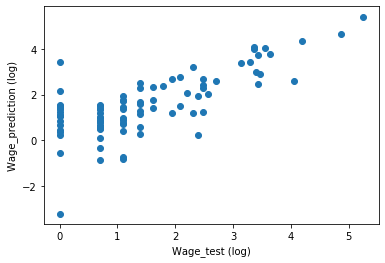

MSE:  92.12905823845534
RMSE:  9.598388314631542
R2:  84.86305579491369
# compare test and prediction
    Wage_test  Wage_prediction
0           8        15.989155
1           1         4.006084
2           2        -0.504005
3           1         0.040074
4          12         3.530706
..        ...              ...
95          4         5.278299
96         27        30.535138
97          1         4.312104
98          3         2.059328
99         31        11.675378

[100 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
189
# median accuracy
2.5014192254462557
# percent deviation
1.3235 %


,Wage_test,Wage_prediction
0,8,15.989155
1,1,4.006084
2,2,-0.504005
3,1,0.040074
4,12,3.530706
...,...,...
95,4,5.278299
96,27,30.535138
97,1,4.312104
98,3,2.059328


In [11]:
polynomial = polynomial_reg(df_small2)
print_scatterplot(polynomial[0], polynomial[1])
print_performance(polynomial[0], polynomial[1])
print_metrics(polynomial[0], polynomial[1])
# print_scores(model, polynomial[0], polynomial[1])


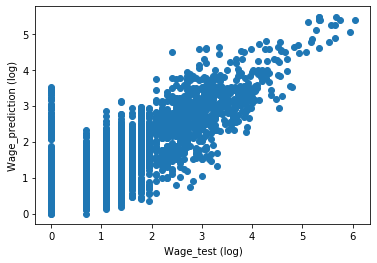

MSE:  143.68260928498813
RMSE:  11.986768091732989
R2:  74.7632046265873
# compare test and prediction
      Wage_test  Wage_prediction
0             4         5.366667
1            11        16.400000
2             2         1.400000
3             3         2.600000
4             5         3.466667
...         ...              ...
2946          3         3.100000
2947          5         4.466667
2948          6         9.233333
2949          9         4.533333
2950          1         1.966667

[2951 rows x 2 columns]
# bad predictions (over 100 difference)
      Wage_test  Wage_prediction
423         285       132.033333
1553        380       155.066667
1596        420       216.066667
1691        205       101.233333
2034        250       118.133333
# span of data
419
# median accuracy
1.4333333333333336
# percent deviation
0.3421 %


,Wage_test,Wage_prediction
0,4,5.366667
1,11,16.400000
2,2,1.400000
3,3,2.600000
4,5,3.466667
...,...,...
2946,3,3.100000
2947,5,4.466667
2948,6,9.233333
2949,9,4.533333


In [23]:
knn = knn_reg(df, 30)
print_scatterplot(knn[0], knn[1])
print_performance(knn[0], knn[1])
print_metrics(knn[0], knn[1])
# print_scores(model, knn[0], knn[1])


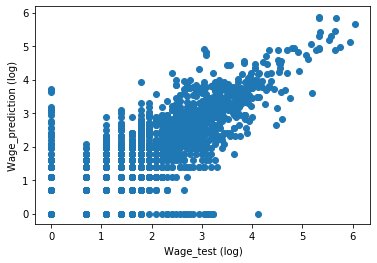

MSE:  149.30260928498814
RMSE:  12.218944687860246
R2:  73.77609288979204
# compare test and prediction
      Wage_test  Wage_prediction
0             4              3.0
1            11              8.0
2             2              2.0
3             3              3.0
4             5              3.0
...         ...              ...
2946          3              7.0
2947          5              7.0
2948          6              5.0
2949          9             10.0
2950          1              1.0

[2951 rows x 2 columns]
# bad predictions (over 100 difference)
      Wage_test  Wage_prediction
423         285            130.0
652         315            145.0
1553        380            165.0
1596        420            285.0
1703        180             36.0
# span of data
419
# median accuracy
1.0
# percent deviation
0.2387 %


,Wage_test,Wage_prediction
0,4,3.0
1,11,8.0
2,2,2.0
3,3,3.0
4,5,3.0
...,...,...
2946,3,7.0
2947,5,7.0
2948,6,5.0
2949,9,10.0


In [13]:
reg = reg_tree(df)
print_scatterplot(reg[0], reg[1])
print_performance(reg[0], reg[1])
print_metrics(reg[0], reg[1])
# print_scores(model, reg[0], reg[1])


In [37]:
df_small1

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,position_cam,position_cb,position_cdm,position_cf,position_cm,position_lam,position_lb,position_lcb,position_lcm,position_ldm,position_lf,position_lm,position_ls,position_lw,position_lwb,position_ram,position_rb,position_rcb,position_rcm,position_rdm,position_rf,position_rm,position_rs,position_rw,position_rwb,position_st
4249,32,70,70,975,5,1816,1.0,2.0,3.0,72,172,60,60,60,65,63,63,63,65,65,65,65,67,67,67,67,67,71,70,70,70,71,70,69,69,69,70,73.0,39.0,59.0,71.0,48.0,69.0,57.0,44.0,68.0,71.0,65.0,63.0,65.0,58.0,63.0,55.0,70.0,75.0,63.0,62.0,72.0,64.0,66.0,52.0,52.0,62.0,68.0,71.0,76.0,11.0,10.0,6.0,16.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4898,25,69,76,1200,1,1428,1.0,3.0,2.0,74,170,46,46,46,45,45,45,45,45,45,45,45,48,49,49,49,48,61,61,61,61,61,63,69,69,69,63,28.0,17.0,73.0,56.0,24.0,46.0,30.0,26.0,32.0,53.0,69.0,54.0,45.0,66.0,47.0,32.0,81.0,82.0,84.0,21.0,61.0,59.0,28.0,30.0,32.0,57.0,71.0,70.0,66.0,9.0,12.0,7.0,7.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1022,25,76,81,10000,22,1792,1.0,3.0,3.0,73,170,69,69,69,69,72,72,72,69,74,74,74,69,77,77,77,69,68,76,76,76,68,68,72,72,72,68,44.0,72.0,51.0,77.0,32.0,70.0,37.0,36.0,78.0,73.0,52.0,38.0,57.0,74.0,46.0,63.0,62.0,64.0,73.0,71.0,74.0,77.0,79.0,80.0,42.0,68.0,60.0,80.0,78.0,11.0,13.0,12.0,9.0,7.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4816,30,69,69,775,18,1832,1.0,3.0,2.0,76,190,65,65,65,64,65,65,65,64,66,66,66,64,68,68,68,64,65,69,69,69,65,66,70,70,70,66,62.0,55.0,69.0,69.0,50.0,65.0,64.0,70.0,70.0,69.0,52.0,51.0,49.0,66.0,49.0,70.0,60.0,50.0,75.0,66.0,62.0,69.0,62.0,66.0,75.0,73.0,67.0,72.0,67.0,13.0,15.0,11.0,14.0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3057,23,72,78,4300,9,1766,1.0,3.0,3.0,70,159,72,72,72,74,73,73,73,74,71,71,71,72,63,63,63,72,53,47,47,47,53,50,41,41,41,50,66.0,69.0,58.0,66.0,68.0,77.0,69.0,72.0,54.0,76.0,85.0,83.0,78.0,68.0,76.0,76.0,65.0,64.0,70.0,66.0,30.0,20.0,67.0,62.0,70.0,66.0,21.0,21.0,21.0,13.0,11.0,8.0,9.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,28,74,74,4400,6,1929,1.0,2.0,3.0,70,152,65,65,65,68,67,67,67,68,68,68,68,70,70,70,70,70,74,73,73,73,74,74,72,72,72,74,67.0,49.0,61.0,67.0,59.0,67.0,66.0,70.0,63.0,70.0,75.0,72.0,72.0,75.0,74.0,62.0,69.0,91.0,67.0,54.0,72.0,75.0,63.0,66.0,37.0,73.0,72.0,74.0,68.0,16.0,12.0,6.0,8.0,10.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6857,22,67,75,1100,4,1632,1.0,3.0,4.0,67,148,64,64,64,69,67,67,67,69,67,67,67,68,60,60,60,68,55,50,50,50,55,52,43,43,43,52,60.0,63.0,39.0,59.0,44.0,70.0,49.0,47.0,53.0,68.0,87.0,84.0,82.0,66.0,74.0,60.0,52.0,64.0,42.0,62.0,45.0,33.0,66.0,55.0,57.0,65.0,51.0,26.0,22.0,11.0,13.0,9.0,12.0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6032,25,68,73,975,4,1667,1.0,3.0,2.0,72,170,49,49,49,55,51,51,51,55,53,53,53,56,56,56,56,56,68,65,65,65,68,69,68,68,68,69,66.0,21.0,58.0,60.0,27.0,54.0,47.0,45.0,52.0,63.0,70.0,70.0,72.0,63.0,69.0,50.0,72.0,67.0,67.0,63.0,68.0,70.0,22.0,37.0,48.0,58.0,65.0,70.0,73.0,15.0,7.0,12.0,10.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0